In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'High', 'Close', 'Low'], axis = 1, inplace = True)

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.set_index('Date', inplace = True)

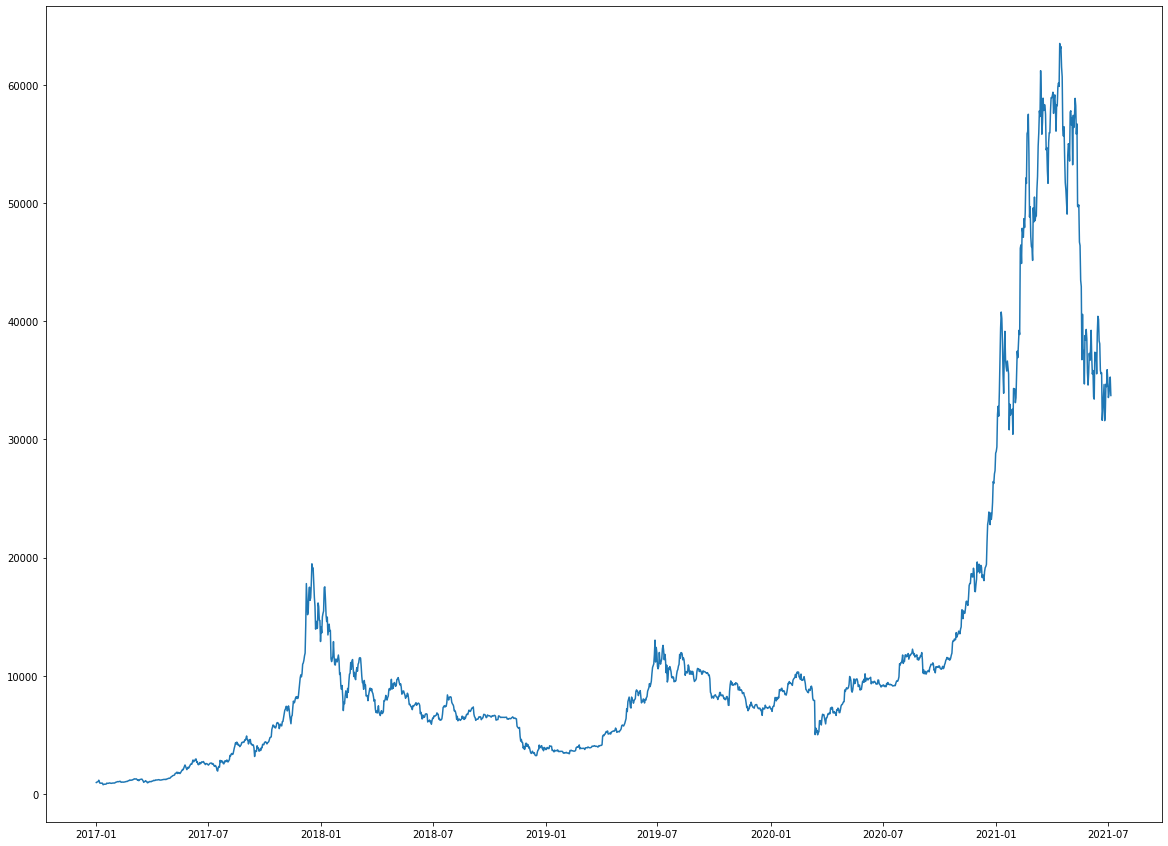

In [24]:
plt.plot(data.index, data.Open)

## Detrend by Differencing
### Такс, пробуємо прибрати наш тренд за допомогою 1 диференціювання

In [9]:
values = data.values

In [25]:
plt.rcParams["figure.figsize"] = (20,20)

<function matplotlib.pyplot.show(close=None, block=None)>

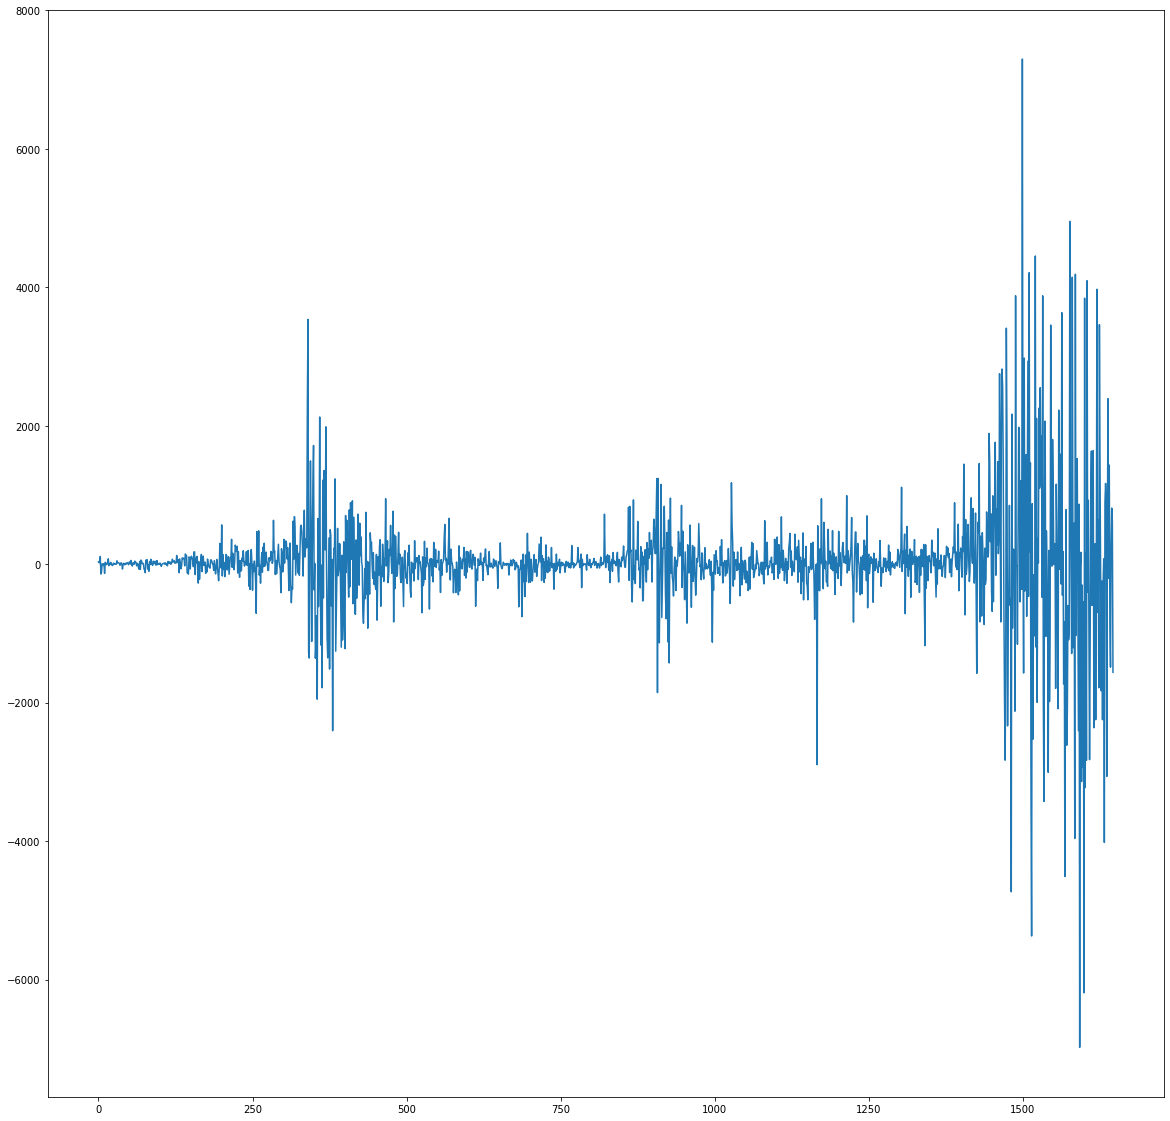

In [11]:
diff = []
for i in range(1, len(values)):
    diff.append(values[i] - values[i-1])

plt.plot(diff)
plt.show

In [10]:
data['Diff_1'] = data['Open'] - data['Open'].shift(1)

In [12]:
data.head(-1)

,Open,Diff_1
Date,,
2017-01-01,963.658020,NaN
2017-01-02,998.617004,34.958984
2017-01-03,1021.599976,22.982971
2017-01-04,1044.400024,22.800049
2017-01-05,1156.729980,112.329956
...,...,...
2021-07-01,35035.982712,-872.405342
2021-07-02,33549.600177,-1486.382535
2021-07-03,33854.421362,304.821184


### На всякий глянемо, що буде після ще одного диференціювання

<function matplotlib.pyplot.show(close=None, block=None)>

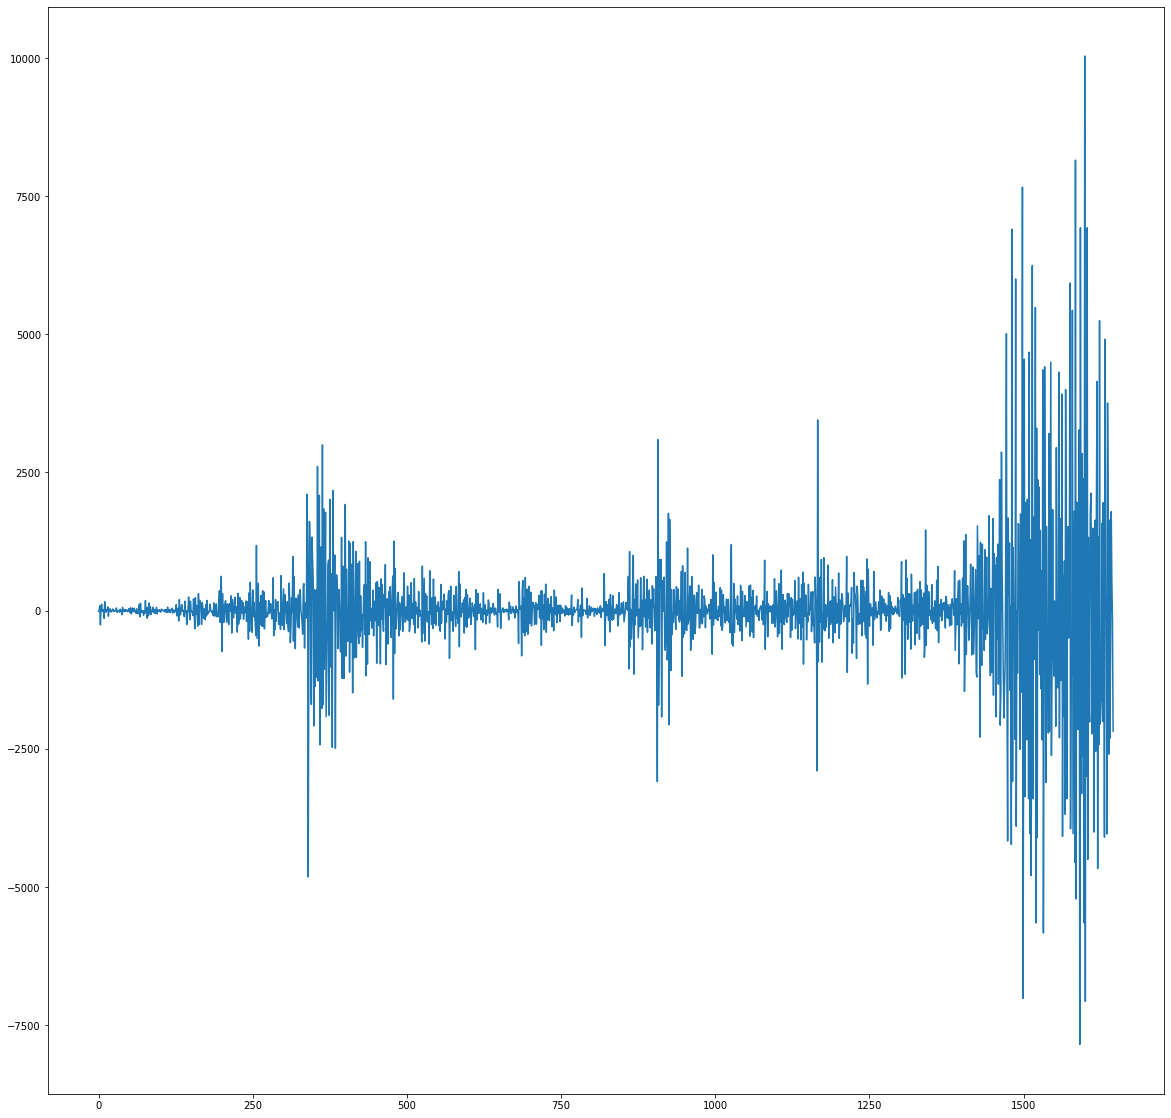

In [12]:
diff_2 = []
for i in range(1, len(diff)):
    diff_2.append(diff[i] - diff[i-1])

plt.plot(diff_2)
plt.show


## Detrend by Model Fitting
### Спробуємо нафітити модель, яка б виглядала як тренд і відняти результат від даних. (вчимо модель, від існуючих даних віднімаємо отримані). Спробуємо для початку лінійну регресію

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [14]:
X = np.arange(len(values)).reshape(-1, 1)
y = values

In [15]:
X, y

(array([[   0],
        [   1],
        [   2],
        ...,
        [1645],
        [1646],
        [1647]]),
 array([[  963.65802002],
        [  998.61700439],
        [ 1021.59997559],
        ...,
        [34665.56486608],
        [35284.34443007],
        [33723.50965515]]))

вчимо модель і будуємо графік тренду поверх значень

In [16]:
model = LinearRegression()

In [17]:
model.fit(X, y)

LinearRegression()

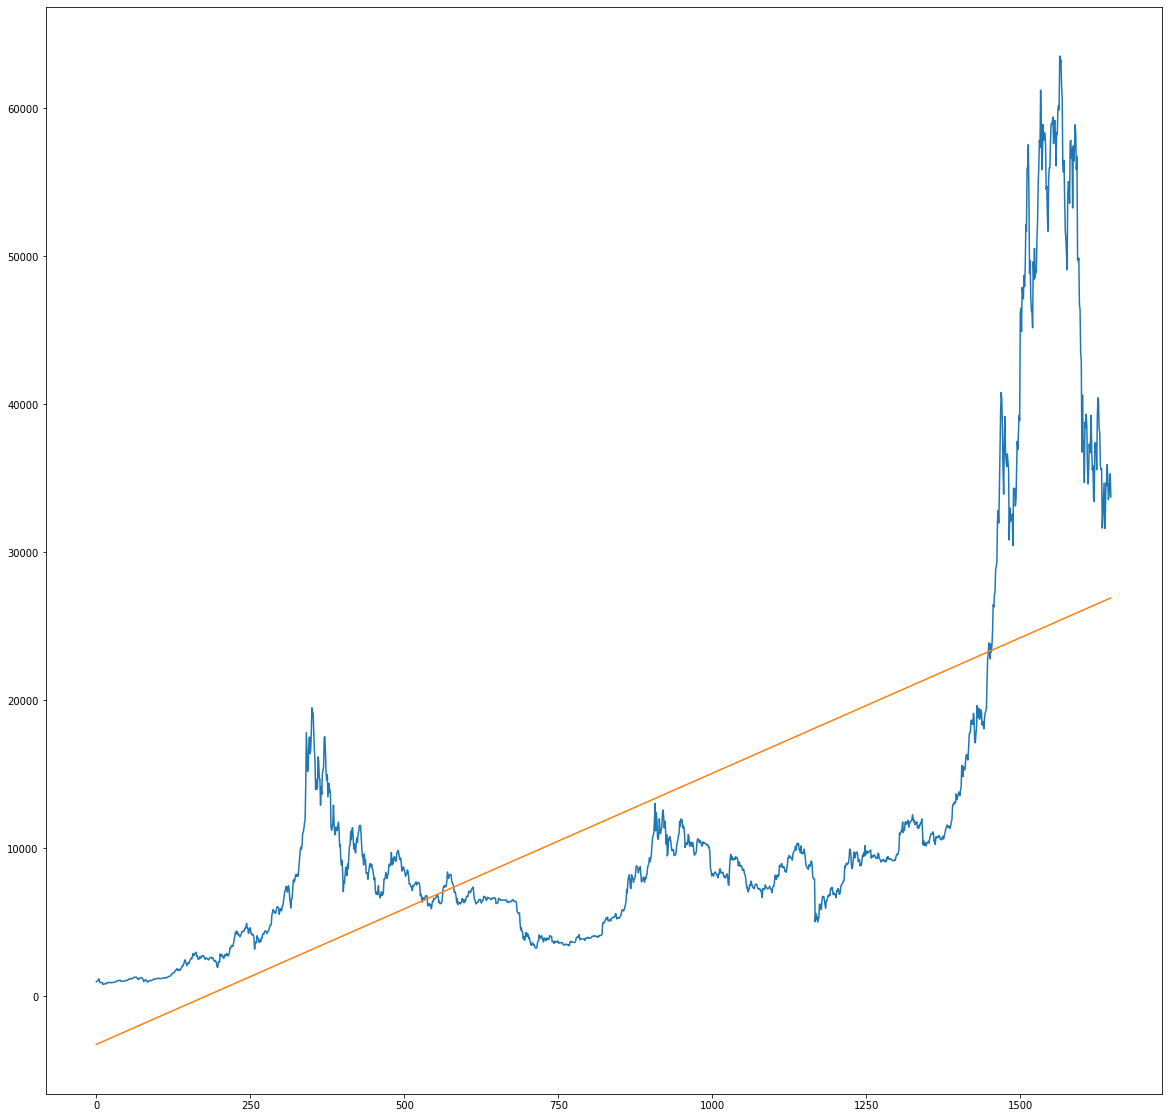

In [18]:
trend = model.predict(X)
# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()

зробимо detrending віднявши від values отримані значення trend

In [26]:
detrended = [y[i] - trend[i] for i in range(len(values))]

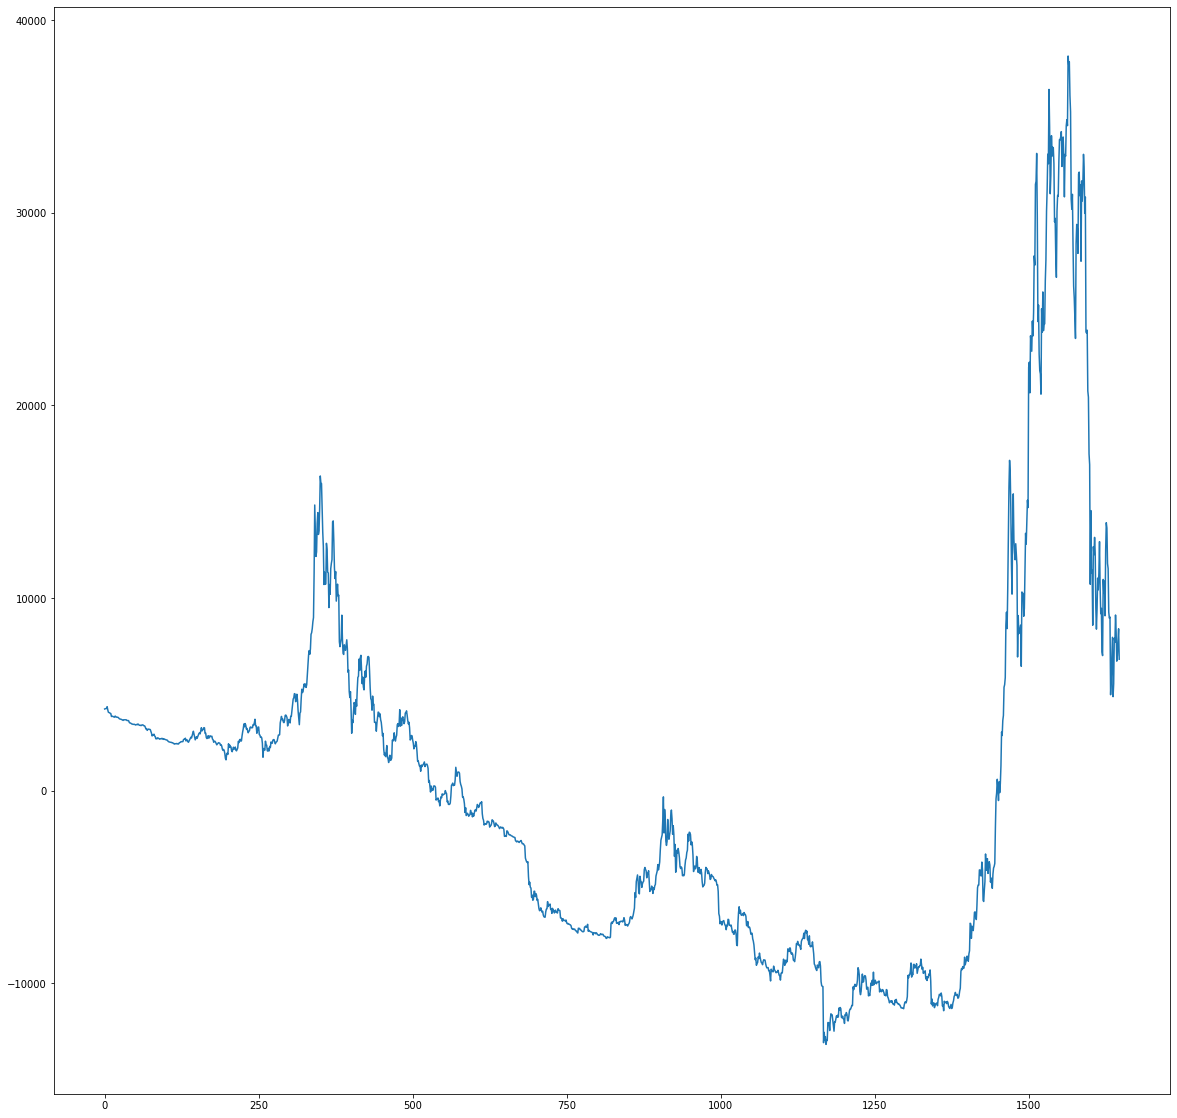

In [27]:
plt.plot(detrended)

#### Результат не дуже 
#### Спробуємо не лінійну модель

In [19]:
from sklearn.preprocessing import PolynomialFeatures

бавлюсь степенем: 8 - досить слабо, 9 - нот бед, 10 - краще, 11 - стає погано
* висновок, глянемо на 9 і 10

In [20]:
poly_reg_9 = PolynomialFeatures(degree=9)
poly_reg_10 = PolynomialFeatures(degree=10)

X_poly_9 = poly_reg_9.fit_transform(X)
X_poly_10 = poly_reg_10.fit_transform(X)

l_reg_9 = LinearRegression()
l_reg_10 = LinearRegression()

l_reg_9.fit(X_poly_9, y)
l_reg_10.fit(X_poly_10, y)

LinearRegression()

In [21]:
trend_9 = l_reg_9.predict(X_poly_9)
trend_10 = l_reg_10.predict(X_poly_10)

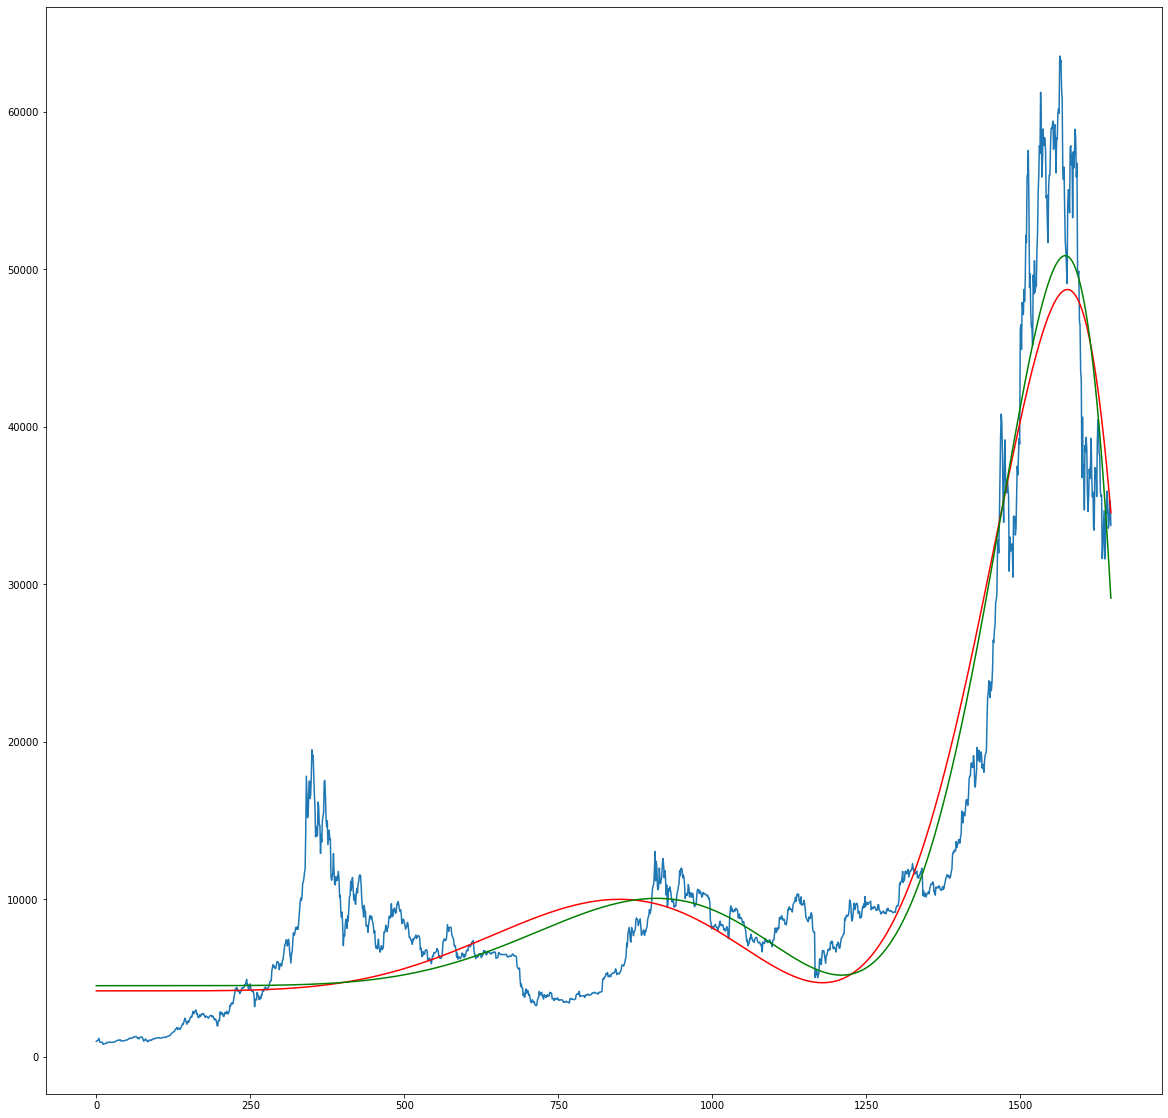

In [22]:
plt.plot(y)
plt.plot(trend_9, color = 'red')
plt.plot(trend_10, color = 'green')


зробимо detrending віднявши від values отримані значення trend

In [32]:
detrended_9 = [y[i] - trend_9[i] for i in range(len(values))]
detrended_10 = [y[i] - trend_10[i] for i in range(len(values))]

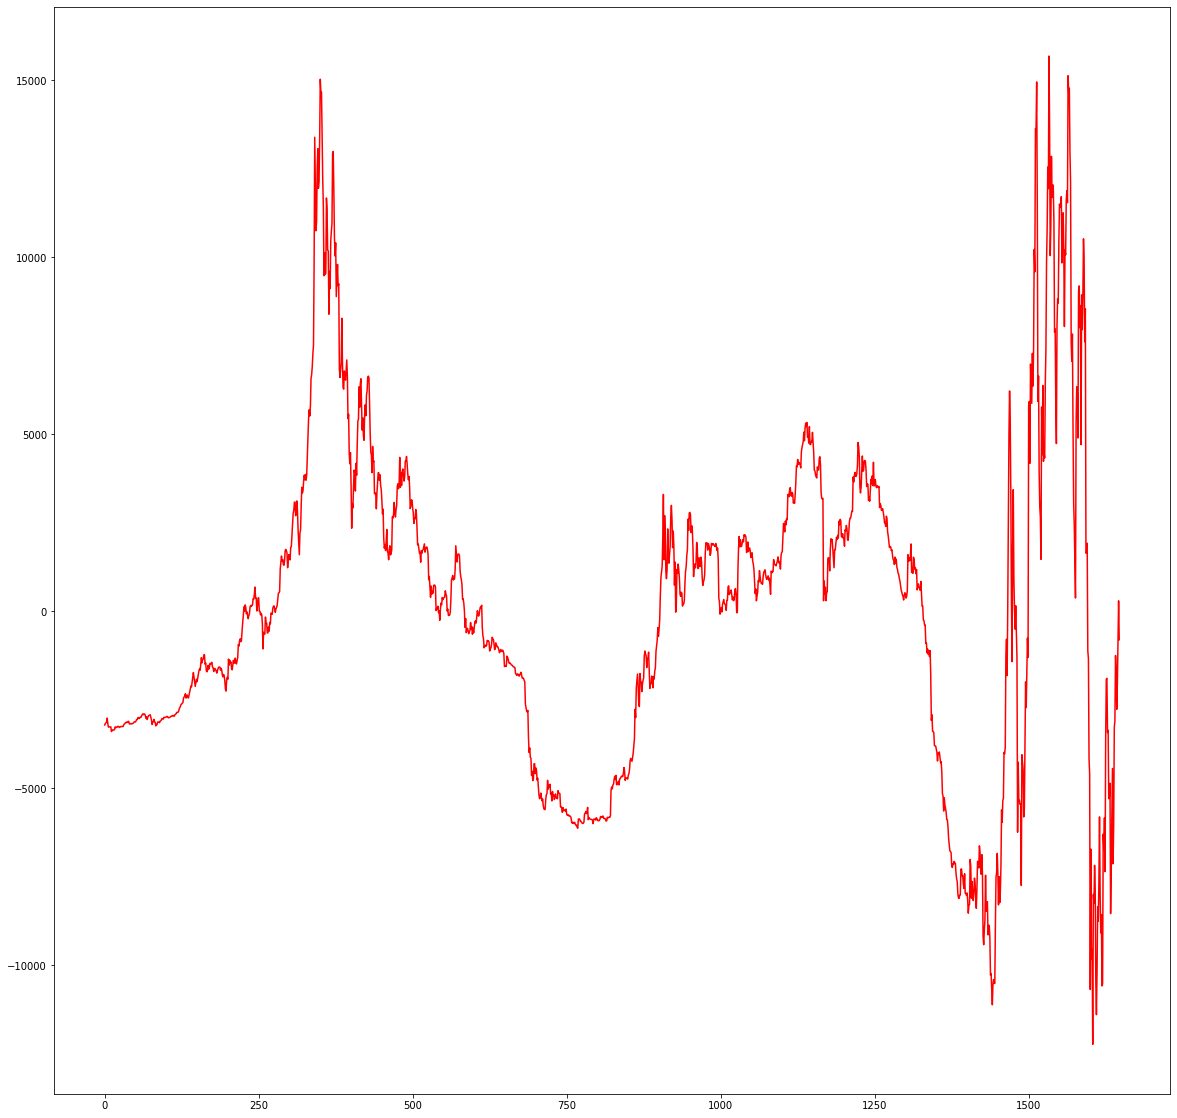

In [33]:
plt.plot(detrended_9, color = 'red')


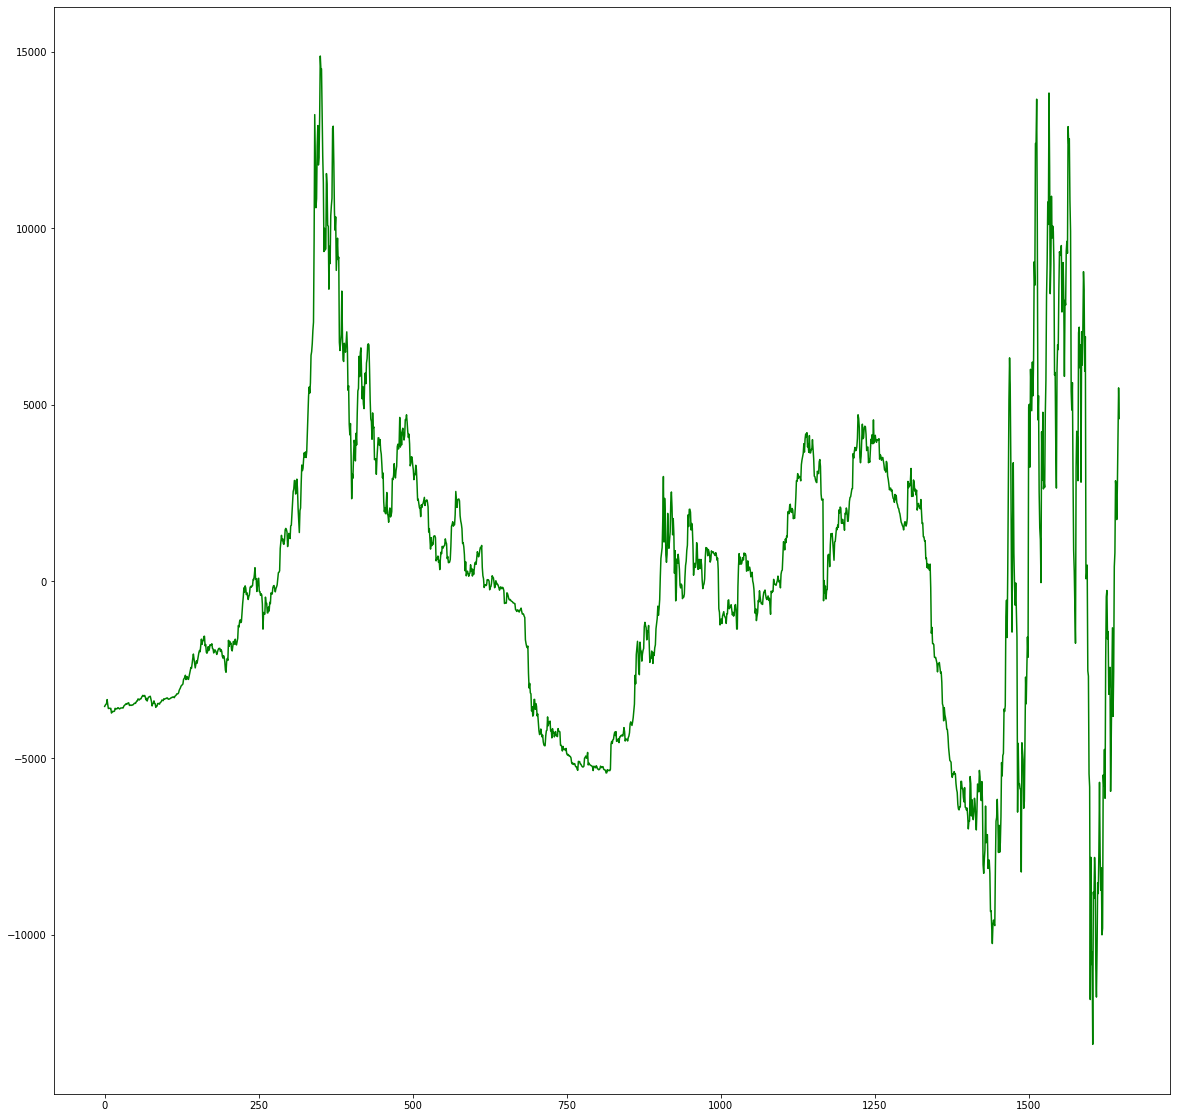

In [131]:
plt.plot(detrended_10, color = 'green')

## Для чого ми це все робили, так це щоб забрати від ряду тренд, тобто зробити  trend stationary.

In [34]:
data['Trend_9'] = trend_9
data['Trend_10'] = trend_10

In [35]:
data['Detrended_9'] = data['Open'] - data['Trend_9']
data['Detrended_10'] = data['Open'] - data['Trend_10']

In [37]:
import numpy as np

In [38]:
data['Log'] = np.log(data['Open'])

In [39]:
data['Log_Diff'] = data['Log'] - data['Log'].shift(1)

In [41]:
data.drop(['Trend', 'Trend_9', 'Trend_10'], axis = 1, inplace = True)

In [42]:
data.to_csv('data_for_stat.csv')